In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('/jbk001-data1/git/SuperPnP/')

import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [27]:
outs_dict = torch.load('inference_outs.pth')

outs_dict['superglue_correspondences'].shape, outs_dict['superglueflow_correspondences'].shape

((250, 4), (6000, 4))

In [28]:
cat_images = np.concatenate([ outs_dict['inputs']['image1'],  outs_dict['inputs']['image2']], axis=0)
superglue_correspondences = outs_dict['superglue_correspondences']
superglueflow_correspondences = outs_dict['superglueflow_correspondences']

h, w = cat_images.shape[0] / 2, cat_images.shape[1] / 2

superglue_correspondences[:10], h, w, superglueflow_correspondences[:10]

(array([[ 25.,   8.,  43.,  84.],
        [255.,   8., 736.,  15.],
        [472.,  11., 768.,  22.],
        [606.,  12., 613.,  10.],
        [195.,  14., 188.,  11.],
        [297.,  16., 294.,  13.],
        [323.,  20., 321.,  17.],
        [185.,  21., 180.,  19.],
        [616.,  21., 770.,  60.],
        [235.,  22., 230.,  20.]], dtype=float32),
 256.0,
 416.0,
 array([[ 59.        ,  14.        ,  49.51680756,  10.59139633],
        [325.        ,  36.        , 323.2897644 ,  34.0123291 ],
        [115.        ,  58.        , 106.94190216,  55.78459167],
        [ 58.        ,  62.        ,  48.58856201,  59.76490402],
        [180.        ,  65.        , 173.30862427,  63.08672333],
        [307.        , 112.        , 304.36965942, 111.73011017],
        [353.        , 169.        , 346.91586304, 174.65423584],
        [ 50.        ,  11.        ,  39.81342697,   7.27459955],
        [ 97.        ,  57.        ,  89.00800323,  54.8116951 ],
        [164.        , 136.      

SuperGlue keypoints and matches

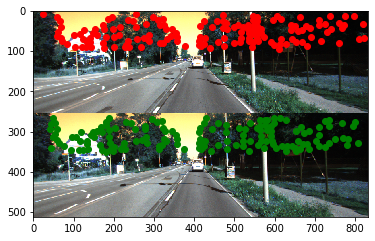

In [29]:
plt.imshow(cat_images, aspect='equal')
num_show = 150

keypoints = outs_dict['keypoints']

count = 0
for keypoint in keypoints[0]:
    if count == num_show:
        break
    plt.plot(keypoint[0], keypoint[1], 'o', color='red')
    count += 1
    
count = 0
for keypoint in keypoints[1]:
    if count == num_show:
        break
    plt.plot(keypoint[0], keypoint[1] + h, 'o', color='green')
    count += 1
    
plt.savefig('keypoint_out.png')

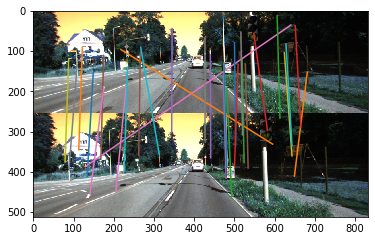

In [32]:
import random
plt.imshow(cat_images, aspect='equal')

for i in range(30):
    idx = random.randint(0, superglue_correspondences.shape[0])
    plt.plot([superglue_correspondences[idx][0], superglue_correspondences[idx][2]], [superglue_correspondences[idx][1], superglue_correspondences[idx][3] + h])

plt.savefig('superglue_sampled_correspondences.png')

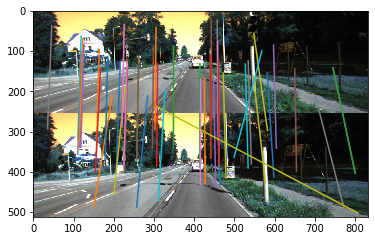

In [34]:
import random
plt.imshow(cat_images, aspect='equal')

for i in range(50):
    idx = random.randint(0, superglueflow_correspondences.shape[0])
    plt.plot([superglueflow_correspondences[idx][0], superglueflow_correspondences[idx][2]], [superglueflow_correspondences[idx][1], superglueflow_correspondences[idx][3] + h])

plt.savefig('superglueflow_sampled_correspondence_out.png')